<a href="https://colab.research.google.com/github/DanielTeko-Agbo/gsl/blob/master/notebooks/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
cols = [a+str(i) for i in range(1,43) for a in list("XYZ")]
cols.append('sign')

In [18]:
df = pd.read_csv('./dataset.csv', names=cols)
data = df.copy()
# data

### PREPROCESSING

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sign'] = label_encoder.fit_transform(data.iloc[:, -1])
label_encoder.classes_

array([' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'equal',
       'negative', 'positive'], dtype=object)

In [20]:
data

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,X40,Y40,Z40,X41,Y41,Z41,X42,Y42,Z42,sign
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.753855,0.780516,-2.783092e-07,0.707944,0.740366,-0.023037,0.665090,0.681268,-0.046624,0.650422,...,0.647332,0.539427,-0.060122,0.621430,0.565719,-0.048807,0.594269,0.562218,-0.038206,13
1956,0.754527,0.781368,-2.719811e-07,0.706204,0.740489,-0.024340,0.662884,0.682793,-0.048191,0.645441,...,0.640877,0.539529,-0.071622,0.617393,0.565177,-0.059336,0.593074,0.562472,-0.049709,13
1957,0.756121,0.784600,-2.919269e-07,0.708100,0.740174,-0.024545,0.664918,0.682015,-0.049987,0.646768,...,0.644277,0.539889,-0.062538,0.618925,0.567810,-0.051054,0.591736,0.565675,-0.040139,13
1958,0.755070,0.779666,-2.660178e-07,0.708111,0.739435,-0.022127,0.665490,0.680687,-0.045329,0.649144,...,0.647579,0.537988,-0.066173,0.623570,0.564143,-0.053956,0.595847,0.562509,-0.044221,13


In [21]:
data.isnull().sum()

X1      0
Y1      0
Z1      0
X2      0
Y2      0
       ..
Z41     0
X42     0
Y42     0
Z42     0
sign    0
Length: 127, dtype: int64

In [22]:
data.sign.value_counts()

0     140
1     140
2     140
3     140
4     140
5     140
6     140
7     140
8     140
9     140
10    140
11    140
12    140
13    140
Name: sign, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.1, shuffle=True)

In [25]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1764, 126), (196, 126), (1764,), (196,))

In [26]:
ytrain.value_counts()

4     131
9     130
6     130
5     128
10    127
8     127
0     126
7     126
13    126
11    126
3     125
12    124
1     120
2     118
Name: sign, dtype: int64

### RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [29]:
rf = pipeline.fit(xtrain, ytrain)

In [30]:
rf.score(xtrain, ytrain)

1.0

In [31]:
rf_pred = rf.predict(xtest)

In [32]:
import pprint
pprint.pprint(classification_report(ytest, rf_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00        14\n'
 '           1       1.00      1.00      1.00        20\n'
 '           2       1.00      1.00      1.00        22\n'
 '           3       1.00      1.00      1.00        15\n'
 '           4       1.00      1.00      1.00         9\n'
 '           5       1.00      1.00      1.00        12\n'
 '           6       1.00      1.00      1.00        10\n'
 '           7       1.00      1.00      1.00        14\n'
 '           8       1.00      1.00      1.00        13\n'
 '           9       1.00      1.00      1.00        10\n'
 '          10       1.00      1.00      1.00        13\n'
 '          11       1.00      1.00      1.00        14\n'
 '          12       1.00      1.00      1.00        16\n'
 '          13       1.00      1.00      1.00        14\n'
 '\n'
 '    accuracy                           1.00       196\n'
 '   macro avg       1.00      1.00      1.0

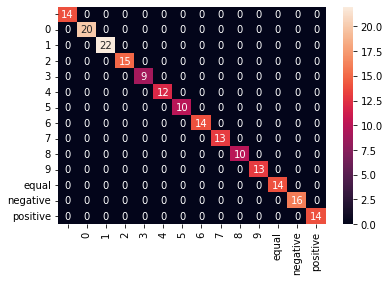

In [33]:
sns.heatmap(confusion_matrix(ytest, rf_pred), annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [34]:
rf.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [35]:
train_size, train_score, test_score = learning_curve(rf, xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

In [36]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR RANDOM FOREST CLASSIFIER')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [65]:
import pickle 
with open("/content/gdrive/My Drive/model.pkl", "wb") as model:
    pickle.dump(rf, model)

#### HYPERPARAMETER TUNING OF THE RANDOM FOREST CLASSIFIER

In [37]:
params = {
    'classifier__max_depth': np.arange(1,25, 2),
    'classifier__n_estimators': np.arange(100,220,20)
}
gridsearch = GridSearchCV(pipeline, params, cv=10)
best_model_rf = gridsearch.fit(xtrain, ytrain)

In [38]:
best_model_rf.best_estimator_
print(best_model_rf.best_params_)
print(best_model_rf.best_score_)

In [39]:
print(best_model_rf.best_estimator_.get_params()['classifier'])

In [40]:
best_model_rf_pred = best_model_rf.predict(xtest)

In [41]:
pprint.pprint(classification_report(ytest, best_model_rf_pred))

In [42]:
sns.heatmap(confusion_matrix(ytest, best_model_rf_pred), annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [43]:
train_size, train_score, test_score = learning_curve(best_model_rf.best_estimator_.get_params()['classifier'], xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

In [44]:
train_size, train_score, test_score

In [45]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

In [46]:
plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR RANDOM FOREST CLASSIFIER WITH TUNED HYPER PARAMETERS')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### XGBOOST CLASSIFIER

In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])
xg = pipeline.fit(xtrain, ytrain)

In [48]:
xg.score(xtrain, ytrain)

1.0

In [49]:
xg_pred = xg.predict(xtest)

In [50]:
pprint.pprint(classification_report(ytest, xg_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00        14\n'
 '           1       1.00      1.00      1.00        20\n'
 '           2       1.00      1.00      1.00        22\n'
 '           3       1.00      1.00      1.00        15\n'
 '           4       1.00      1.00      1.00         9\n'
 '           5       1.00      1.00      1.00        12\n'
 '           6       1.00      1.00      1.00        10\n'
 '           7       1.00      1.00      1.00        14\n'
 '           8       1.00      1.00      1.00        13\n'
 '           9       1.00      1.00      1.00        10\n'
 '          10       1.00      1.00      1.00        13\n'
 '          11       1.00      1.00      1.00        14\n'
 '          12       1.00      1.00      1.00        16\n'
 '          13       1.00      1.00      1.00        14\n'
 '\n'
 '    accuracy                           1.00       196\n'
 '   macro avg       1.00      1.00      1.0

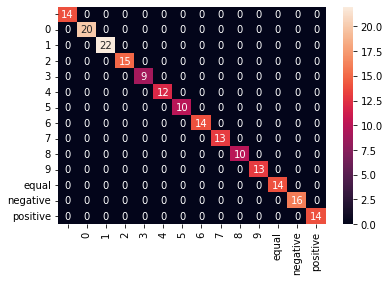

In [51]:
sns.heatmap(confusion_matrix(ytest, xg_pred), annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [52]:
xg.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', XGBClassifier(objective='multi:softprob'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': XGBClassifier(objective='multi:softprob'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__base_score': 0.5,
 'classifier__booster': 'gbtree',
 'classifier__colsample_bylevel': 1,
 'classifier__colsample_bynode': 1,
 'classifier__colsample_bytree': 1,
 'classifier__gamma': 0,
 'classifier__learning_rate': 0.1,
 'classifier__max_delta_step': 0,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 1,
 'classifier__missing': None,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': 1,
 'classifier__nthread': None,
 'classifier__objective': 'multi:softprob',
 'classifier__random_state': 0,
 'classifier__reg_alpha': 0,
 'classifier__reg_lambda': 1,
 'classifier__scale_pos_weight': 1,
 'classifier__seed': None,
 'classifier__silent': None,
 'classifier__s

In [53]:
train_size, train_score, test_score = learning_curve(xg, xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

In [54]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR XGBOOST CLASSIFIER')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### HYPERPARAMETER TUNING OF THE XGBOOST CLASSIFIER

In [55]:
params = {
    'classifier__max_depth': np.arange(1,25, 2),
    'classifier__n_estimators': np.arange(100,220,20),
    'classifier__learning_rate': np.arange(0.1, 1.0, 0.05)
}
gridsearch = GridSearchCV(pipeline, params)
best_model_xg = gridsearch.fit(xtrain, ytrain)

In [56]:
best_model_xg.best_estimator_
print(best_model_xg.best_params_)
print(best_model_xg.best_score_)

In [57]:
best_model_xg_pred = best_model_xg.predict(xtest)

In [58]:
pprint.pprint(classification_report(ytest, best_model_xg_pred))

In [59]:
sns.heatmap(confusion_matrix(ytest, best_model_xg_pred), annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [60]:
train_size, train_score, test_score = learning_curve(best_model_xg.best_estimator_.get_params()['classifier'], xtrain, ytrain, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 60))

In [61]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

In [62]:
plt.subplots(1, figsize=(10,9))
plt.plot(train_size, train_mean, '--', color='#111111', label='Training Score')
plt.plot(train_size, test_mean, color="#111111", label="Cross Validation")

# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('LEARNING CURVE FOR XGBOOST CLASSIFIER WITH TUNED HYPER PARAMETERS')
plt.xlabel("TRAINING SET SIZE")
plt.ylabel("ACCURACY SCORE")
plt.legend(loc='best')
plt.tight_layout()
plt.show()